In [1]:
!pip install pillow matplotlib numpy



In [2]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os


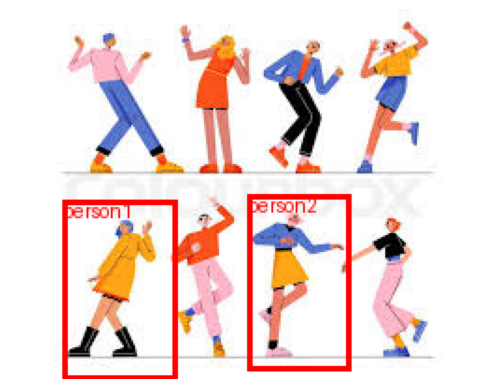

In [3]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os

# Define the file paths for the image and its corresponding label file
image_folder = r'C:\Users\gupta\Desktop\data_label\Labellmg_learning\image'
label_folder = r'C:\Users\gupta\Desktop\data_label\Labellmg_learning\label'

# Define the image and label file names
image_file = 'i1.jpg'
label_file = 'i1.txt'

# Full paths for the image and label files
image_path = os.path.join(image_folder, image_file)
label_path = os.path.join(label_folder, label_file)

# Path to the classes.txt file (your class names)
classes_file = r'C:\Users\gupta\Desktop\data_label\Labellmg_learning\classes.txt'

# Load the class names from classes.txt
with open(classes_file, 'r') as file:
    class_names = file.read().strip().split('\n')

# Load the image
image = Image.open(image_path)

# Read the label file
with open(label_path, 'r') as file:
    lines = file.readlines()

# Image width and height (needed to convert from relative to pixel values)
image_width, image_height = image.size

# Prepare to draw bounding boxes on the image
draw = ImageDraw.Draw(image)

# Loop through each line in the label file
for line in lines:
    # Extract the values (class_id, center_x, center_y, width, height)
    class_id, center_x, center_y, width, height = map(float, line.strip().split())

    # Convert the coordinates from relative to absolute pixel values
    xmin = int((center_x - width / 2) * image_width)
    ymin = int((center_y - height / 2) * image_height)
    xmax = int((center_x + width / 2) * image_width)
    ymax = int((center_y + height / 2) * image_height)

    # Get the class name corresponding to class_id
    class_name = class_names[int(class_id)]  # Retrieve class name from class_names list

    # Draw the bounding box
    draw.rectangle([xmin, ymin, xmax, ymax], outline='red', width=3)

    # Add the class name text on the image
    draw.text((xmin, ymin), class_name, fill='red')

# Show the image with bounding boxes and class names
plt.imshow(image)
plt.axis('off')  # Hide the axis for a clean visualization
plt.show()
